In [1]:
#Import Depedencies

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Set up parameters: method 1 - get from link
import pandas as pd
df_tl = pd.read_csv('https://query.data.world/s/fxguk7urfvwos2oxen2nma7x53tyyy')
df_tl.head()

C:\Users\yings\anaconda3\envs\PythonData38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,504,Laramie,Wyoming,2020-08-12,America,New York Times,0,56021.0,USA,United States,US,4,3
1,509,Laramie,Wyoming,2020-08-13,America,New York Times,0,56021.0,USA,United States,US,5,3
2,512,Laramie,Wyoming,2020-08-14,America,New York Times,0,56021.0,USA,United States,US,3,3
3,512,Laramie,Wyoming,2020-08-15,America,New York Times,0,56021.0,USA,United States,US,0,3
4,517,Laramie,Wyoming,2020-08-16,America,New York Times,0,56021.0,USA,United States,US,5,3


In [3]:
#identify incomplete rows
df_tl.count()

PEOPLE_POSITIVE_CASES_COUNT        2923854
COUNTY_NAME                        2693694
PROVINCE_STATE_NAME                2740548
REPORT_DATE                        2923854
CONTINENT_NAME                     2913168
DATA_SOURCE_NAME                   2923854
PEOPLE_DEATH_NEW_COUNT             2923854
COUNTY_FIPS_NUMBER                 2646840
COUNTRY_ALPHA_3_CODE               2913168
COUNTRY_SHORT_NAME                 2923854
COUNTRY_ALPHA_2_CODE               2912346
PEOPLE_POSITIVE_NEW_CASES_COUNT    2923854
PEOPLE_DEATH_COUNT                 2923854
dtype: int64

In [4]:
#identify the time period
date_start = df_tl['REPORT_DATE'].min()
date_end = df_tl['REPORT_DATE'].max()
print (f"Report time period starts from {date_start} to {date_end}")

Report time period starts from 2020-01-21 to 2022-04-21


In [5]:
#drop rows with missing info
drop_missing_df_tl = df_tl.dropna(how ='any')
drop_missing_df_tl = drop_missing_df_tl[drop_missing_df_tl["PEOPLE_POSITIVE_NEW_CASES_COUNT"] > 0]
drop_missing_df_tl

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,504,Laramie,Wyoming,2020-08-12,America,New York Times,0,56021.0,USA,United States,US,4,3
1,509,Laramie,Wyoming,2020-08-13,America,New York Times,0,56021.0,USA,United States,US,5,3
2,512,Laramie,Wyoming,2020-08-14,America,New York Times,0,56021.0,USA,United States,US,3,3
4,517,Laramie,Wyoming,2020-08-16,America,New York Times,0,56021.0,USA,United States,US,5,3
5,523,Laramie,Wyoming,2020-08-17,America,New York Times,0,56021.0,USA,United States,US,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923848,492,Laramie,Wyoming,2020-08-06,America,New York Times,0,56021.0,USA,United States,US,3,3
2923849,496,Laramie,Wyoming,2020-08-07,America,New York Times,0,56021.0,USA,United States,US,4,3
2923850,498,Laramie,Wyoming,2020-08-08,America,New York Times,0,56021.0,USA,United States,US,2,3
2923851,502,Laramie,Wyoming,2020-08-09,America,New York Times,0,56021.0,USA,United States,US,4,3


In [6]:
#verify dropped rows
drop_missing_df_tl.count()

PEOPLE_POSITIVE_CASES_COUNT        1498429
COUNTY_NAME                        1498429
PROVINCE_STATE_NAME                1498429
REPORT_DATE                        1498429
CONTINENT_NAME                     1498429
DATA_SOURCE_NAME                   1498429
PEOPLE_DEATH_NEW_COUNT             1498429
COUNTY_FIPS_NUMBER                 1498429
COUNTRY_ALPHA_3_CODE               1498429
COUNTRY_SHORT_NAME                 1498429
COUNTRY_ALPHA_2_CODE               1498429
PEOPLE_POSITIVE_NEW_CASES_COUNT    1498429
PEOPLE_DEATH_COUNT                 1498429
dtype: int64

In [7]:
#sort based on date
sorted_dates_df = drop_missing_df_tl.sort_values("REPORT_DATE")
sorted_dates_df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
741898,1,Snohomish,Washington,2020-01-21,America,New York Times,0,53061.0,USA,United States,US,1,0
2448500,1,Cook,Illinois,2020-01-24,America,New York Times,0,17031.0,USA,United States,US,1,0
39659,1,Orange,California,2020-01-25,America,New York Times,0,6059.0,USA,United States,US,1,0
2416793,1,Los Angeles,California,2020-01-26,America,New York Times,0,6037.0,USA,United States,US,1,0
2854687,1,Maricopa,Arizona,2020-01-26,America,New York Times,0,4013.0,USA,United States,US,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743938,40771,San Juan,New Mexico,2022-04-21,America,New York Times,1,35045.0,USA,United States,US,6,745
2517515,7344,Franklin,Louisiana,2022-04-21,America,New York Times,0,22041.0,USA,United States,US,1,178
425395,28544,Middlesex,Connecticut,2022-04-21,America,New York Times,0,9007.0,USA,United States,US,42,480
128101,69293,Marion,Oregon,2022-04-21,America,New York Times,1,41047.0,USA,United States,US,43,716


In [8]:
#overview of date column
sorted_dates_df["REPORT_DATE"].value_counts()

2022-01-19    3090
2022-02-02    3052
2020-12-04    3025
2022-01-26    3017
2020-12-18    3005
              ... 
2020-02-10       1
2020-02-12       1
2020-02-13       1
2020-02-17       1
2020-01-21       1
Name: REPORT_DATE, Length: 802, dtype: int64

In [9]:
new_grouped_df_tl = sorted_dates_df.groupby(["REPORT_DATE"]).sum()
new_grouped_df_tl = new_grouped_df_tl.reset_index()
new_grouped_df_tl

,REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2020-01-21,1,0,53061.0,1,0
1,2020-01-24,1,0,17031.0,1,0
2,2020-01-25,1,0,6059.0,1,0
3,2020-01-26,2,0,10050.0,2,0
4,2020-01-30,2,0,17031.0,1,0
...,...,...,...,...,...,...
797,2022-04-17,8665858,2,10720622.0,10556,107854
798,2022-04-18,39012997,222,45749624.0,44341,465584
799,2022-04-19,44085697,391,39182998.0,45630,503556
800,2022-04-20,51912411,826,55816157.0,66935,624201


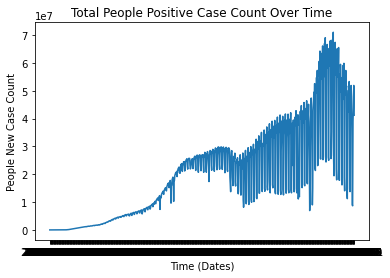

In [10]:
#Graph 1: Case count vs. time(dates) for the whole US population
x = new_grouped_df_tl["REPORT_DATE"]
y = new_grouped_df_tl["PEOPLE_POSITIVE_CASES_COUNT"]
plt.plot(x,y)
plt.title("Total People Positive Case Count Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("People New Case Count")
plt.savefig('graphs/total_positive_cases_over_time_daily.png')
plt.show()

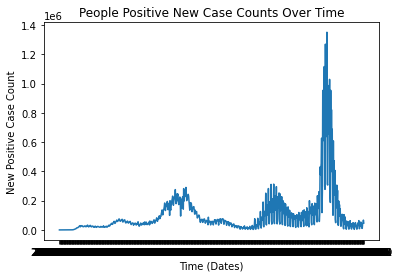

In [11]:
#Graph 2: Positive New Case count vs. time(dates) over the time
x1 = new_grouped_df_tl["REPORT_DATE"]
y1 = new_grouped_df_tl["PEOPLE_POSITIVE_NEW_CASES_COUNT"]
plt.plot(x1,y1)
plt.title("People Positive New Case Counts Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("New Positive Case Count")
plt.savefig('graphs/new_positive_cases_over_time_daily).png')
plt.show()

In [12]:
import pandas as pd, datetime as dt
new_grouped_df_tl['REPORT_DATE'] = pd.to_datetime(new_grouped_df_tl['REPORT_DATE'])
new_grouped_df_tl['WeekDate'] = new_grouped_df_tl.apply(lambda row: row['REPORT_DATE'] - dt.timedelta(days=row['REPORT_DATE'].weekday()), axis=1)
new_grouped_df_tl = new_grouped_df_tl.groupby('WeekDate').sum().reset_index()
new_grouped_df_tl

,WeekDate,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2020-01-20,5,0,86201.0,5,0
1,2020-01-27,8,0,60301.0,6,0
2,2020-02-03,1,0,55025.0,1,0
3,2020-02-10,4,0,102131.0,3,0
4,2020-02-17,27,0,122229.0,15,0
...,...,...,...,...,...,...
113,2022-03-21,306496694,4714,280744007.0,209489,3587660
114,2022-03-28,287723530,3826,271625238.0,187792,3351253
115,2022-04-04,264337251,2820,250523835.0,222894,3145826
116,2022-04-11,235146761,3066,220345821.0,224139,2789810


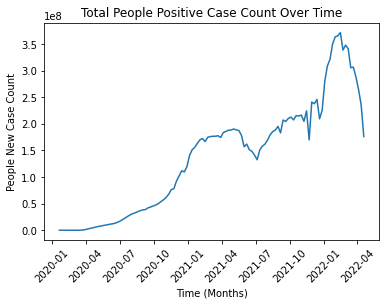

In [13]:
#Graph 1-2: Case count vs. time(dates) for the whole US population - vy month
x = new_grouped_df_tl["WeekDate"]
y = new_grouped_df_tl["PEOPLE_POSITIVE_CASES_COUNT"]
plt.plot(x,y)
plt.title("Total People Positive Case Count Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("People New Case Count")
plt.xticks(rotation = 45)
plt.savefig('graphs/total_positive_cases_over_time_monthly.png')
plt.show()

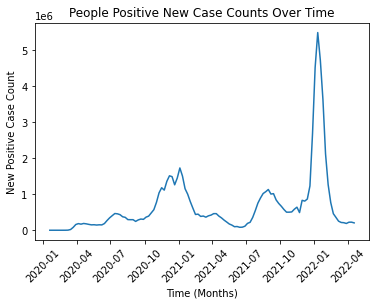

In [14]:
#Graph 2_2: Positive New Case count vs. time(dates) over the time
x1 = new_grouped_df_tl["WeekDate"]
y1 = new_grouped_df_tl["PEOPLE_POSITIVE_NEW_CASES_COUNT"]
plt.plot(x1,y1)
plt.title("People Positive New Case Counts Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("New Positive Case Count")
plt.xticks(rotation = 45)
plt.savefig('graphs/new_positive_cases_over_time.png')
plt.show()